In [ ]:
import os

# Imports
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks, layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

In [ ]:

target_size = (224, 224)
input_shape = (224, 224, 3)
grid_shape = (1, 224, 224, 3)

batch_size = 32

In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/image_data_class/archive (2).zip'
extract_path = '/content/drive/MyDrive/img'

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
train_dir = "/content/drive/MyDrive/img/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
test_dir = "/content/drive/MyDrive/img/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [ ]:
train_aug = ImageDataGenerator(
    rescale=1/255.0,
    fill_mode="nearest",
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
)
image_size=224

train_data = train_aug.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode="categorical"
)

test_aug = ImageDataGenerator(

    rescale=1/255.0
)

# Read data from directory
test_data = test_aug.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset = "training"
)

valid_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.5
)

valid_data = valid_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size = 32,
    shuffle = True,
    # seed = 64,
    class_mode = "categorical",
    subset = "validation"
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Found 8777 images belonging to 38 classes.


In [ ]:
base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

# Freeze the layers in the base model to prevent them from being trained
for layer in base_model.layers:
    layer.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
classes = os.listdir(train_dir)
classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
inputs = keras.Input(shape=input_shape)

# Get the layer
x = base_model (inputs, training = False)

# Stack layers further
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(len(classes), activation="softmax")(x)

# Combine the model
model = Model(inputs=inputs, outputs=x)

# Summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 38)                48678     
                                                                 
Total params: 2,306,662
Trainable params: 48,678
Non-trainabl

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Define callbacks to use
early_stopping_cb = callbacks.EarlyStopping(monitor="loss", patience=3)

In [ ]:
# Train model
history = model.fit(
    train_data,
    epochs=15,
    steps_per_epoch=150,
    validation_data=valid_data,
    callbacks=[early_stopping_cb]
)

Epoch 1/15
150/150 [==============================] - 436s 3s/step - loss: 1.9240 - accuracy: 0.4963 - val_loss: 0.9600 - val_accuracy: 0.7618
Epoch 2/15
150/150 [==============================] - 432s 3s/step - loss: 0.8398 - accuracy: 0.7669 - val_loss: 0.6850 - val_accuracy: 0.8068
Epoch 3/15
150/150 [==============================] - 415s 3s/step - loss: 0.6808 - accuracy: 0.8012 - val_loss: 0.5442 - val_accuracy: 0.8449
Epoch 4/15
150/150 [==============================] - 419s 3s/step - loss: 0.5441 - accuracy: 0.8373 - val_loss: 0.4743 - val_accuracy: 0.8620
Epoch 5/15
150/150 [==============================] - 430s 3s/step - loss: 0.4804 - accuracy: 0.8556 - val_loss: 0.4505 - val_accuracy: 0.8620
Epoch 6/15
150/150 [==============================] - 415s 3s/step - loss: 0.4738 - accuracy: 0.8560 - val_loss: 0.4175 - val_accuracy: 0.8743
Epoch 7/15
150/150 [==============================] - 442s 3s/step - loss: 0.4336 - accuracy: 0.8646 - val_loss: 0.3707 - val_accuracy: 0.8873

In [ ]:
model.save("/content/drive/MyDrive/image_data_class/ai_plant_disease_detection_1.h5")

In [ ]:
model.evaluate(test_data)

550/550 [==============================] - 517s 940ms/step - loss: 0.2962 - accuracy: 0.9069


[0.2962462306022644, 0.9068973660469055]

In [ ]:
# Load the model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/image_data_class/ai_plant_disease_detection_1.h5')

# Print the summary of the loaded model
loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 38)                48678     
                                                                 
Total params: 2,306,662
Trainable params: 48,678
Non-trainabl

<function matplotlib.pyplot.legend(*args, **kwargs)>

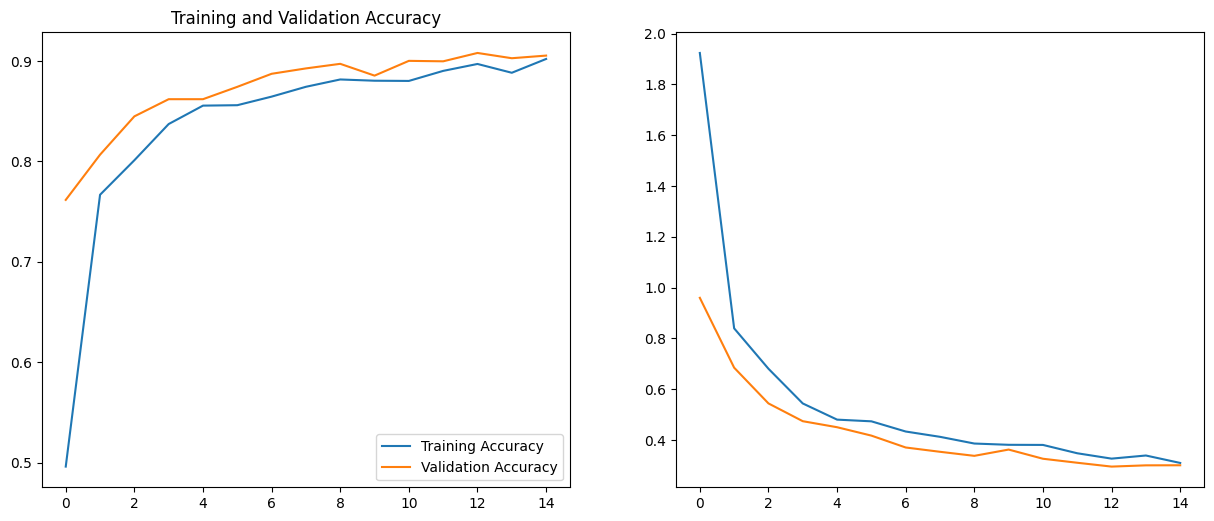

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(15)
plt.figure(figsize=(15, 13))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend